In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import nglview as nv
from scipy.spatial.distance import cdist
from heapq import heappush, heappop

import pandas as pd
from pyntcloud import PyntCloud

# conda install -c conda-forge pyntcloud
# conda install -c conda-forge pythreejs
# https://medium.com/analytics-vidhya/3d-cad-to-binary-voxel-numpy-array-b538d00d97da

import sys
sys.path.append('/Users/thor/surfdrive/Projects/FilamentsDNA/')
from voxelizer import *
%load_ext autoreload
%autoreload 2

/Users/thor/opt/anaconda3/envs/prodna/lib/python3.11/site-packages/pyntcloud/utils/numba.py:4: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/Users/thor/opt/anaconda3/envs/prodna/lib/python3.11/site-packages/pyntcloud/utils/numba.py:11: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/Users/thor/opt/anaconda3/envs/prodna/lib/python3.11/site-packages/pynt

In [2]:
tetra = md.load('./pdbs/tetra.pdb')
traj = tetra.atom_slice(tetra.top.select('chainid 0 1 2 3')).center_coordinates()
# view = nv.show_mdtraj(traj)
# view

In [3]:
def get_COM_selections(traj, QGR_resids):
    coms = []
    for ids in QGR_resids:
        selection = traj.top.select(f'resid {ids[0]} {ids[1]} {ids[2]}')
        com = md.compute_center_of_mass(traj.atom_slice(selection))
        coms.append(com)
    return np.array([list(l) for l in list(np.array(coms).swapaxes(0,1)[0])])


%matplotlib inline
V = Voxelizer(traj.xyz[0],n=50)
# get the coordinates of the center of mass of the QGR residues
QGR_resids = [[111,112,113],[248,249,250],[522,523,524],[385,386,387]] # for each chain the QGR residues
coms = get_COM_selections(traj, QGR_resids)
V.process_points(points=np.array(coms))
path = V.find_path(ordered=True)
print(len(path))

Point [41 25 43] is inside voxel space. Moving to nearest zero voxel.
Point [41 25 43], 103793 is nearest zero voxel (41, 24, 42), 103742
Point [28 15 24] is inside voxel space. Moving to nearest zero voxel.
Point [28 15 24], 70774 is nearest zero voxel (27, 15, 24), 68274
Point [11 18 22] is inside voxel space. Moving to nearest zero voxel.
Point [11 18 22], 28422 is nearest zero voxel (10, 18, 22), 25922
Point [40 36  2] is inside voxel space. Moving to nearest zero voxel.
Point [40 36  2], 101802 is nearest zero voxel (40, 37, 2), 101852


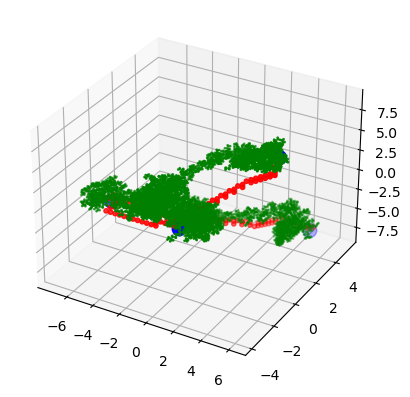

In [4]:
path_xyz = V.voxel_to_xyz(path)
fig = plt.figure()  
ax = fig.add_subplot(projection='3d')
ax.scatter3D(path_xyz[:,0], path_xyz[:,1], path_xyz[:,2], c='r', s=10)
ax.scatter3D(coms[:,0], coms[:,1], coms[:,2], c='b', s=100)
ax.scatter3D(traj.xyz[0,:,0], traj.xyz[0,:,1], traj.xyz[0,:,2], c='g', s=1)